# Load in data

In [26]:
import pandas as pd
import numpy as np

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [11]:
df = pd.read_csv('../data/train_cleaned.csv', index_col='Unnamed: 0')
df['cleaned'] = df['cleaned'].apply(eval)  # Convert the 'cleaned' column to a list of values
df['words'] = df['cleaned'].apply(lambda x: " ".join(x))  # Join the lists as a single string


# fit_score function

In [12]:
def fit_score(estimator, vectorizer, dataframe=df, random_state=0):
    '''
    
    Prints the model type, vectorizer type, as well as train and test accuracy. 
    Also printsa classification report and plots a confusion matrix on the test data.
    
    Parameters:
    estimator - sklearn estimator
    vectorizer - sklearn word vectorizer
    dataframe - df containing cleaned dataset
    random_state - random state to be used
    
    Returns:
    estimator - fitted sklearn estimator
    
    '''
    
    # vectorize
    X = vectorizer.fit_transform(dataframe.words)
    # target
    y = df['class']
    
    # 80/20 split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    # fit model
    estimator.fit(X_train, y_train)
    
    # training acc, testing acc
    train_acc, test_acc = estimator.score(X_train, y_train), estimator.score(X_test, y_test)
    
    print(f'Model: {estimator}')
    print(f'Vectorizer: {vectorizer}')
    print(f'Train accuracy: {train_acc*100:.1f}%')
    print(f'Test accuracy: {test_acc*100:.1f}%')
    
    print('\n\nClassification Report (Test Data):')
    print(classification_report(y_test, estimator.predict(X_test)))
    
    cm = ConfusionMatrixDisplay.from_estimator(estimator, X_test, y_test)
    cm.ax_.set_title('Conf Matrix on Test Data')

# Simple models

### MultinomialNB with CountVectorizer

Model: MultinomialNB()
Vectorizer: CountVectorizer()
Train accuracy: 70.8%
Test accuracy: 59.5%


Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.70      0.79      0.74       653
           2       0.53      0.70      0.60       294
           3       0.47      0.58      0.52       393
           4       0.65      0.76      0.70       585
           5       0.55      0.33      0.41       963

    accuracy                           0.59      2888
   macro avg       0.58      0.63      0.60      2888
weighted avg       0.59      0.59      0.58      2888



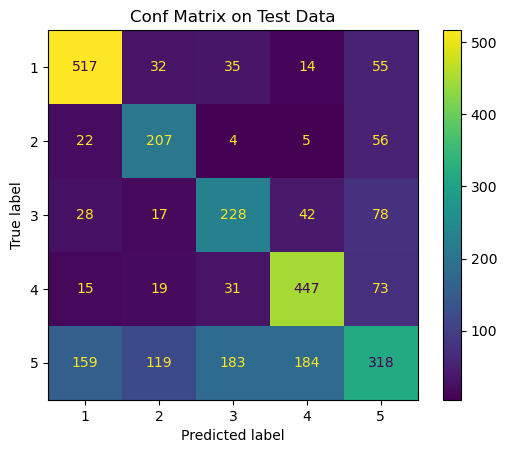

In [13]:

fit_score(MultinomialNB(), CountVectorizer())

### DecisionTree with CountVectorizer

Model: DecisionTreeClassifier()
Vectorizer: CountVectorizer()
Train accuracy: 82.1%
Test accuracy: 43.4%


Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.58      0.61      0.60       653
           2       0.35      0.36      0.35       294
           3       0.31      0.33      0.32       393
           4       0.52      0.54      0.53       585
           5       0.34      0.32      0.33       963

    accuracy                           0.43      2888
   macro avg       0.42      0.43      0.43      2888
weighted avg       0.43      0.43      0.43      2888



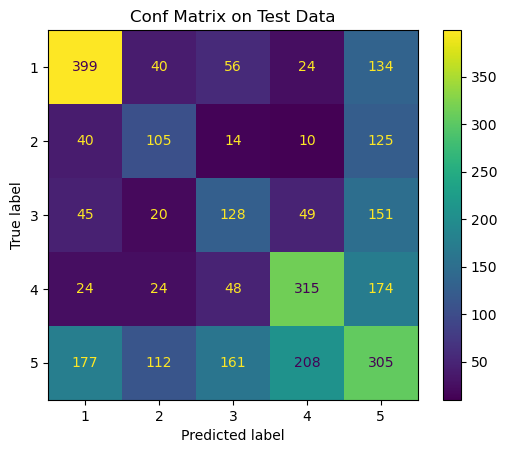

In [14]:
fit_score(DecisionTreeClassifier(), CountVectorizer())

### MultinomialNB with TfidfVectorizer

Model: MultinomialNB()
Vectorizer: TfidfVectorizer()
Train accuracy: 59.2%
Test accuracy: 52.3%


Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.73      0.64      0.68       653
           2       1.00      0.00      0.01       294
           3       0.41      0.02      0.03       393
           4       0.70      0.58      0.64       585
           5       0.41      0.77      0.53       963

    accuracy                           0.52      2888
   macro avg       0.65      0.40      0.38      2888
weighted avg       0.60      0.52      0.47      2888



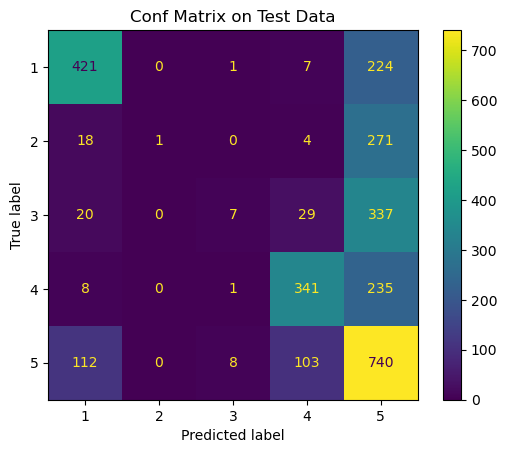

In [18]:
fit_score(MultinomialNB(), TfidfVectorizer())

### DecisionTree with TfidfVectorizer

Model: DecisionTreeClassifier()
Vectorizer: TfidfVectorizer()
Train accuracy: 82.1%
Test accuracy: 42.3%


Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.58      0.62      0.60       653
           2       0.34      0.35      0.35       294
           3       0.31      0.30      0.30       393
           4       0.51      0.53      0.52       585
           5       0.32      0.29      0.31       963

    accuracy                           0.42      2888
   macro avg       0.41      0.42      0.42      2888
weighted avg       0.42      0.42      0.42      2888



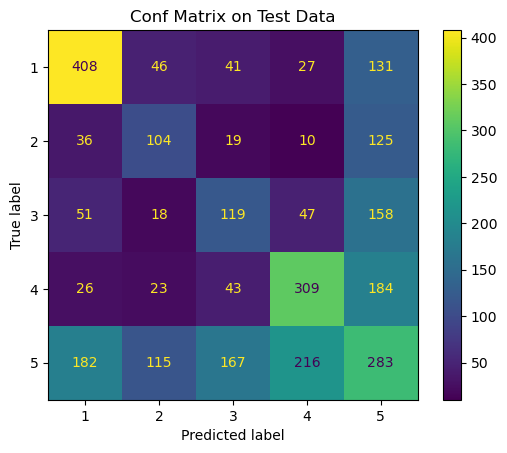

In [16]:
fit_score(DecisionTreeClassifier(), TfidfVectorizer())

### DecisionTree with HashingVectorizer

Model: DecisionTreeClassifier()
Vectorizer: HashingVectorizer()
Train accuracy: 82.1%
Test accuracy: 42.5%


Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.57      0.61      0.59       653
           2       0.35      0.38      0.37       294
           3       0.32      0.33      0.33       393
           4       0.51      0.52      0.51       585
           5       0.33      0.29      0.31       963

    accuracy                           0.42      2888
   macro avg       0.41      0.43      0.42      2888
weighted avg       0.42      0.42      0.42      2888



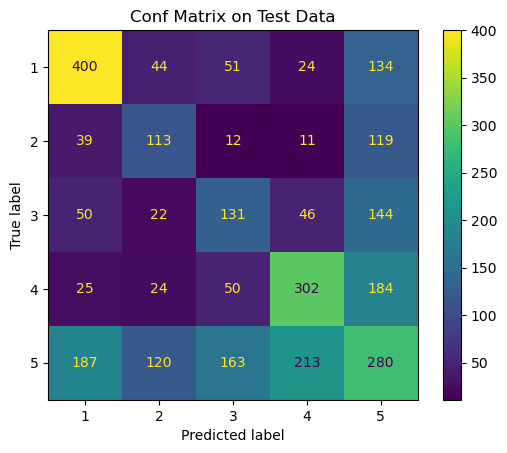

In [17]:
fit_score(DecisionTreeClassifier(), HashingVectorizer())

- Best simple model was __MultinomialNB, CountVectorizer__ with a 59.5% test acc

In [ ]:
# Train the k-NN classifier
k = 5  # Number of neighbors (you can adjust this)
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

In [27]:
k = 5
fit_score(KNeighborsClassifier(n_neighbors=k), CountVectorizer())

Model: KNeighborsClassifier()
Vectorizer: CountVectorizer()
Train accuracy: 63.6%
Test accuracy: 43.8%

Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.47      0.70      0.56       653
           2       0.48      0.22      0.31       294
           3       0.25      0.15      0.18       393
           4       0.58      0.47      0.52       585
           5       0.38      0.42      0.40       963

    accuracy                           0.44      2888
   macro avg       0.43      0.39      0.39      2888
weighted avg       0.43      0.44      0.42      2888



(KNeighborsClassifier(), None)

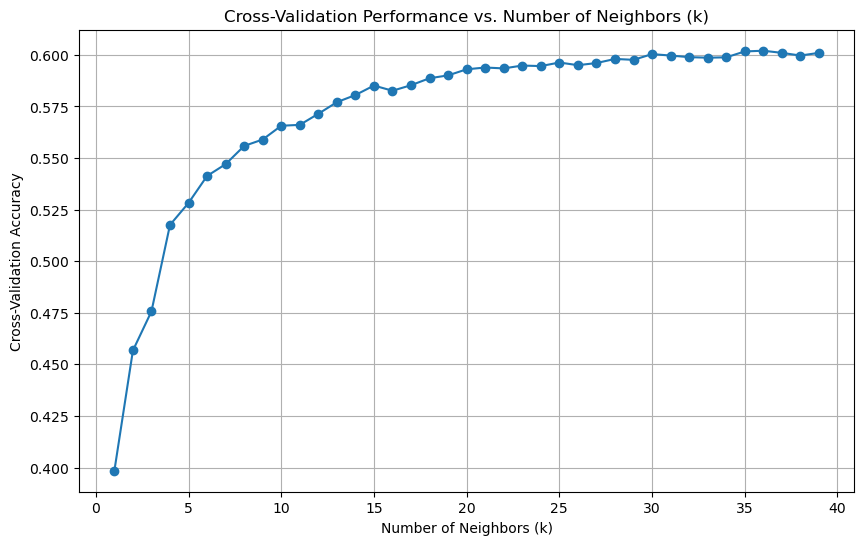

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Define a range of k values to test
k_values = list(range(1, 40))  # You can adjust this range

# Initialize lists to store cross-validation scores
cv_scores = []

# Perform k-fold cross-validation for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold cross-validation
    cv_scores.append(scores.mean())

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-')
plt.title('Cross-Validation Performance vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)
plt.show()


In [32]:
# Assuming you already have your KNN model and test data
knn = KNeighborsClassifier(n_neighbors=20)  # Replace 'optimal_k' with your chosen k value
knn.fit(X_train, y_train)  # Train the model

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           1       0.65      0.80      0.72       653
           2       0.60      0.54      0.57       294
           3       0.55      0.44      0.49       393
           4       0.62      0.77      0.68       585
           5       0.54      0.43      0.48       963

    accuracy                           0.60      2888
   macro avg       0.59      0.60      0.59      2888
weighted avg       0.59      0.60      0.59      2888



Text(0.5, 1.0, 'Conf Matrix on Test Data')

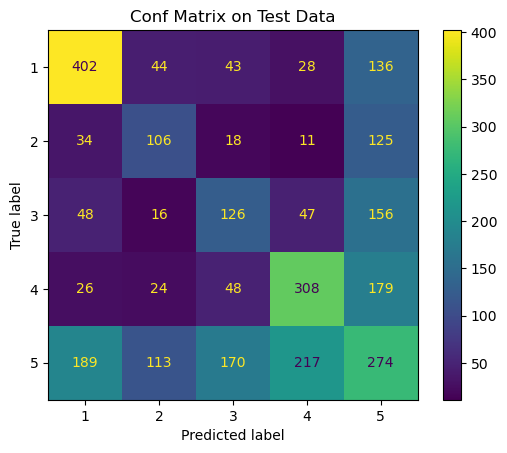

In [35]:
cm = ConfusionMatrixDisplay.from_estimator(estimator, X_test, y_test)
cm.ax_.set_title('Conf Matrix on Test Data')

In [36]:
k = 20
fit_score(KNeighborsClassifier(n_neighbors=k), CountVectorizer())

Model: KNeighborsClassifier(n_neighbors=20)
Vectorizer: CountVectorizer()
Train accuracy: 53.0%
Test accuracy: 48.8%

Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.62      0.64      0.63       653
           2       0.67      0.10      0.17       294
           3       0.43      0.08      0.13       393
           4       0.69      0.39      0.50       585
           5       0.40      0.73      0.51       963

    accuracy                           0.49      2888
   macro avg       0.56      0.39      0.39      2888
weighted avg       0.54      0.49      0.45      2888



(KNeighborsClassifier(n_neighbors=20), None)

In [37]:
k = 20
fit_score(KNeighborsClassifier(n_neighbors=k),TfidfVectorizer())

Model: KNeighborsClassifier(n_neighbors=20)
Vectorizer: TfidfVectorizer()
Train accuracy: 64.0%
Test accuracy: 59.7%

Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.65      0.80      0.72       653
           2       0.60      0.54      0.57       294
           3       0.55      0.44      0.49       393
           4       0.62      0.77      0.68       585
           5       0.54      0.43      0.48       963

    accuracy                           0.60      2888
   macro avg       0.59      0.60      0.59      2888
weighted avg       0.59      0.60      0.59      2888



(KNeighborsClassifier(n_neighbors=20), None)

In [38]:
k = 20
fit_score(KNeighborsClassifier(n_neighbors=k), TfidfVectorizer(max_df=0.5))


Model: KNeighborsClassifier(n_neighbors=20)
Vectorizer: TfidfVectorizer(max_df=0.5)
Train accuracy: 64.0%
Test accuracy: 59.7%

Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.65      0.80      0.72       653
           2       0.60      0.54      0.57       294
           3       0.55      0.44      0.49       393
           4       0.62      0.77      0.68       585
           5       0.54      0.43      0.48       963

    accuracy                           0.60      2888
   macro avg       0.59      0.60      0.59      2888
weighted avg       0.59      0.60      0.59      2888



(KNeighborsClassifier(n_neighbors=20), None)